# Formatação do Pulso

Os dados gerados pela fonte e codificados tem valores discretos em um determinado conjunto finito $\{x_1, ..., x_N\}$, e precisam ser transformados em um sinal analógico para serem transmitidos. Um primeiro passo nesse sentido é associar cada valor $x_i$  um pulso de duração $T$, que poderá em seguida ser modulado.

O formato do pulso usado para representar o valor de saída dos codificadores influencia diretamente a largura de banda ocupada. Por exemplo, consideremos um pulso quadrado, dado por
$$\Pi\left(\frac{t}{T}\right) = \left\{\begin{array}{cc}
1     &  -T/2 \leq t \leq T/2\\
0     &  c.c
\end{array}\right.
$$
cujas amplitudes serão alterados pelos valores $x_i$. Aplicando a transformada de Fourier obtemos
$$
\Pi(f) = T.sinc(fT),
$$
que como sabemos tem largura de banda infinita.

Uma questão a ser resolvida é qual pulso pode ser utilizado para obter uma representação limitada no tempo e na frequência. Pelo princípio da incerteza sabe-se que é impossível ser limitado em ambos os domínios, logo procura-se formatos de pulsos que seja aproximadamente limitados no tempo e na frequência.

A formatação do pulso tem outras implicações que não estão somente relacionadas a ocupação espectral, como veremos no resto deste capítulo. Inicialmente suponhameos que a sequência de símbolos $x_k,\ k = 1, 2, 3, ...$ é convertida em um trem de impulsos anlógicos
$$
x(t) = \sum_k x_k\delta(t-kT)
$$
que passa pelo formatador de pulsos com resposta $p(t)$ produzindo
$$
m(t) = x(t)*p(t).
$$
Com isso, o espectro do sinal mensagem é dado por 
$$
M(f) = X(f)P(f),
$$
que terá espectro do pulso $p(t)$. Como exemplo, se o pulso quadrado $\Pi(t/T)$ for utilizado teremos um sinal mensagem cujo espectro será uma sinc.

Nesse momento, como estamos preocupados somente com a ocupação espectral, podemos utilizar um formato para $p(t)$ que seja mais compacto no tempo. Um exemplo é dado por
$$
cl(t) = \frac{A}{2}\left(1 + \cos\frac{\pi t}{\tau}\right)\Pi\left(\frac{t}{2\tau}\right)
$$
cuja tranformada de Fourier é dada por
$$
CL(f) = \frac{A\tau.sinc(2f\tau)}{1 - (2f\tau)^2}
$$
e está representado na Figura abaixo.

FIGURA

Observe que o cosseno levantado é função limitada do tempo, e aproximadamente limitada da frequência, visto que a potência cai com o qauadrado da frequência.

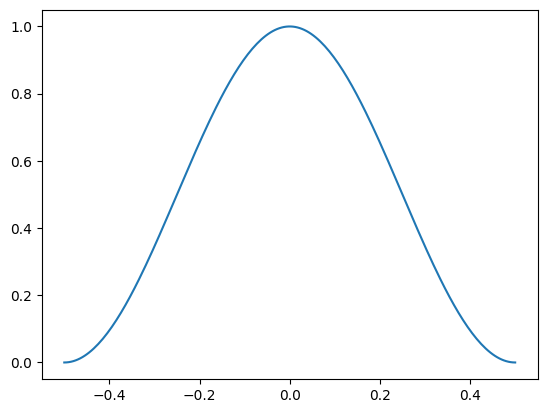

In [27]:
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

A = 1
tau = 0.5
t = np.linspace(-0.5,0.5, 200)
cl = (A/2)*(1+np.cos(np.pi*t/tau))
plt.plot(t, cl)

Antes de continuarmos a análise sobre a formtação de pulsos devemos apresentar a representação de sinais em Digrama de olho. Caso ainda não tenho sido apresentado a esse conceito, visite a página EyeDiagram.

## Pulsos de Nyquist

Considere que o trem de impulsos analógicos $x(t)$ que após formatado gera o sinal $m(t)$, é transmitido por um canal com resposta $h_c(t)$ e recebido por um filtro com resposta $h_r(t)$. Na saída do filtro de recepçã tem-se
$$
y(t) = x(t)*p(t)*h_c(t)*h_r(t).
$$
Escrevendo uma resposta ao impulso equivalente como $ h_{equiv}(t) = p(t)*h_c(t)*h_r(t)$ temos que
$$
H_{equiv}(f) = P(f)H_c(f)H_R(f).
$$
Uma possibilidade para o sistema é escolher $H_R(f)$ de tal forma que $H_{equiv}(f)$ se comporte como um sistema sem distorção, ou seja, apenas um atraso. Entretanto, esse requisito é muito complexo de ser obtido, principalmente em canais não lineares ou variantes no tempo. 

Por outro lado, sabendo que na recepção o que importa para decisão sobre o símbolo transmitido são os instantes de amostragem, $kT$, e se for garantido que nesses instantes os valores dos pulsos na recepção não se sobrepõem, não importa o que acontece nos demais instantes. Isso é equivalente a dizer que se no Diagrama de olho, a houver separação entre as passagens dos sinais distintos, ou seja, o olho for mantido aberto  a decisão está garantida. 

A condição para que não haja sobreposição é formatos os pulsos como
$$
h_{NYQ}(kT + \tau) = \left\{\begin{array}{cc} c
     & k=0 \\ 0 & k \neq 0 
\end{array}
\right.
$$
conhecido com **pulsos de Nyquist**.

O pulso com formato de $sinc$ já proposto em parágrafos anteriores é um pulso de Nyquist, entretanto como já foi afirmado sofre dos problemas de não relizaçaõ física e causalidade.

Algumas propriedades desejadas para os pulsos de Nyquist são:
1. tenha cruzamento nos zeros de forma apriopriada;
2. em frequência tenha bandas laterias com decaiments rápido, enquanto mantenham um perfil estreito na frequência.

Outro bom exemplo e que já foi apresentado é o cosseno levantado, cujo espectro de frequências também pode ser descrito  por:
$$
|H(f)| = \left\{\begin{array}{cc} 1  & |f| \leq (f_x - \Delta f) \\ \frac{1}{2}\left\{1 + \sin\left\{\frac{\pi}{2}\left(1-\frac{|f|}{f_x}\right)\frac{f_x}{\Delta f}\right]\right\},
     &  (f_x - \Delta f) < |f| < (f_x + \Delta f) \\ 0, & |f\ \geq (f_x + \Delta f)
\end{array} \right.
$$ 
com fase linear, e cuja magnitude do espectro está representada na figura abaixo. $f_x$ é a frequência de corte (-6dB), es está relacionada com o período de símbolo $T_0$ por $f_x = R_s/2 = 1/(2T_0)$. $\Delta f$ é o excesso de largura de banda. Define-se também o fator de *roll-off* como $\alpha = \frac{\Delta f}{f_x}$.

Visitar: https://github.com/FelipeNoberto/Roll-Off-Effect-to-Signal

Quando $\alpha = 1$ temos o cosseno levantado completo, 
$$
|H(f)| = \left\{\begin{array}{cc} \cos^2\left(\frac{\pi}{f}{4f_x}\right) & |f| \leq 2f_x \\ 0, & |f| > 2f_x \end{array}\right.
$$
e cuja expressão no tempo é dada por
$$
h(t) = 2f_x\frac{\sin 2\pi f_x t}{2\pi f_x t}\frac{\cos 2\pi f_x t}{1 - (4f_x t)^2}.
$$


A largura de banda absoluta de um filtro com a resposta cosseno levantado é dada por
$$
B = \frac{1}{2T_0}(1+\alpha) = \frac{R_s}{2}(1 + \alpha) Hz
$$
sendo $R_s$ a taxa de símbolo (ou *baud rate*). Por exemplo, para um sinal transmitido a uma taxa de informação de 8 kbit/s usando um sinal em banda básica com 64 níveis e um pulso cosseno levantado com fator de roll-off de 40\%, ocupa uma largura de banda de
$$
B = (8.10^3/\log_2 64)/2(1 + 0.4) = 933,1 Hz.
$$

Um parâmetro importante é o que relaciona a quantidade de símbolos que se coloca um um Hertz de frequência, conhecida como eficiência espectral. Por exemplo, para um sinal binário, quando $\alpha = 0$ temos 2 símbolos/Hz,e a medida que $\alpha$ aumenta esse valor diminui.

Existem outros formatos de pulsos mas que não serão apresentados nesse texto.

Vistiar https://pysdr.org/content/pulse_shaping.html